In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Histogram
- 이미지의 밝기의 분포를 그래프로 표현
- 이미지 전체의 밝기 분포, 채도를 알 수 있다.

## BINS
- 히스토그램 그래프의 X축 간격
- histSize라 표현

## DIMS
- 조사하고자 하는 값 ( 빛의 강도 / RGB값 )

## RANGE
- 측정하고자 하는 갑의 범위 ( X축의 from ~ to )

---
## Practice
### Histogram 그리기 
- cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

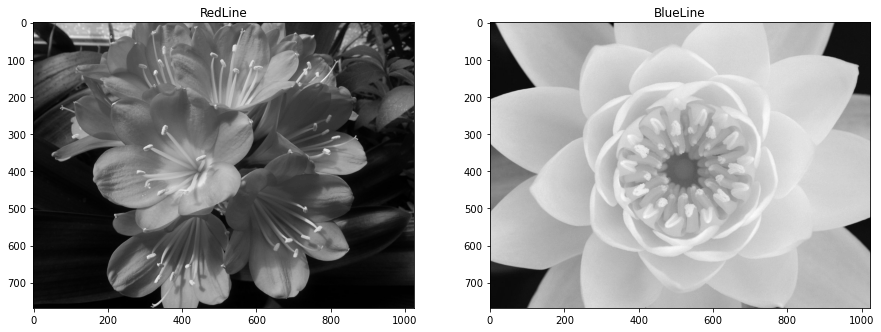

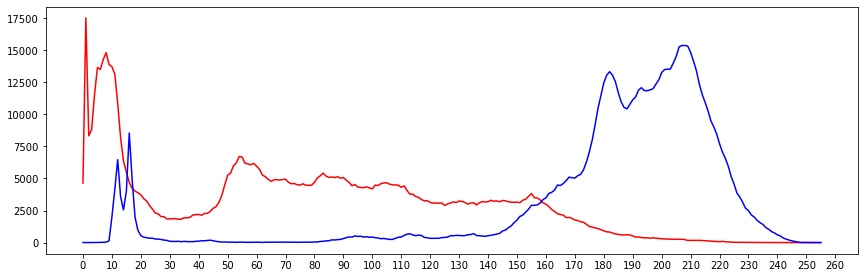

In [21]:
img1 = cv2.imread('src/flower1.jpg',0)
img2 = cv2.imread('src/flower2.jpg',0)

hist1 = cv2.calcHist([img1], [0], None, [256], [0,256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])

plt.figure(figsize = (15,12))
plt.subplot(221);plt.imshow(img1,'gray');plt.title("RedLine")
plt.subplot(222);plt.imshow(img2,'gray');plt.title("BlueLine")
plt.figure(figsize=(32,10))
plt.subplot(223);plt.plot(hist1,color = 'r'),plt.plot(hist2,color = 'b')
plt.xticks(np.arange(0,261,10))
plt.show()

### Mask를 적용하여 Histogram 그리기

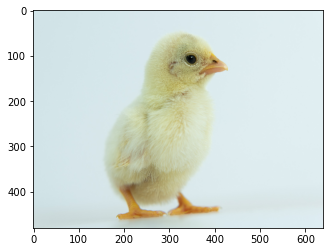

In [38]:
img = cv2.imread('src/image.jpg')
img = cv2.resize(img, (640,480))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

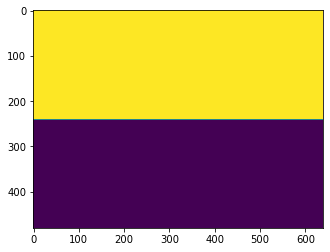

In [73]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[0:241, :] = 255
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask)

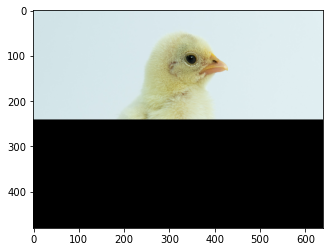

In [74]:
masked_img = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(masked_img)

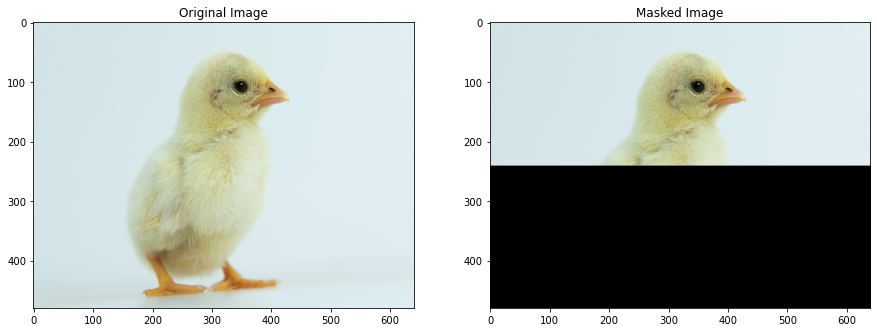

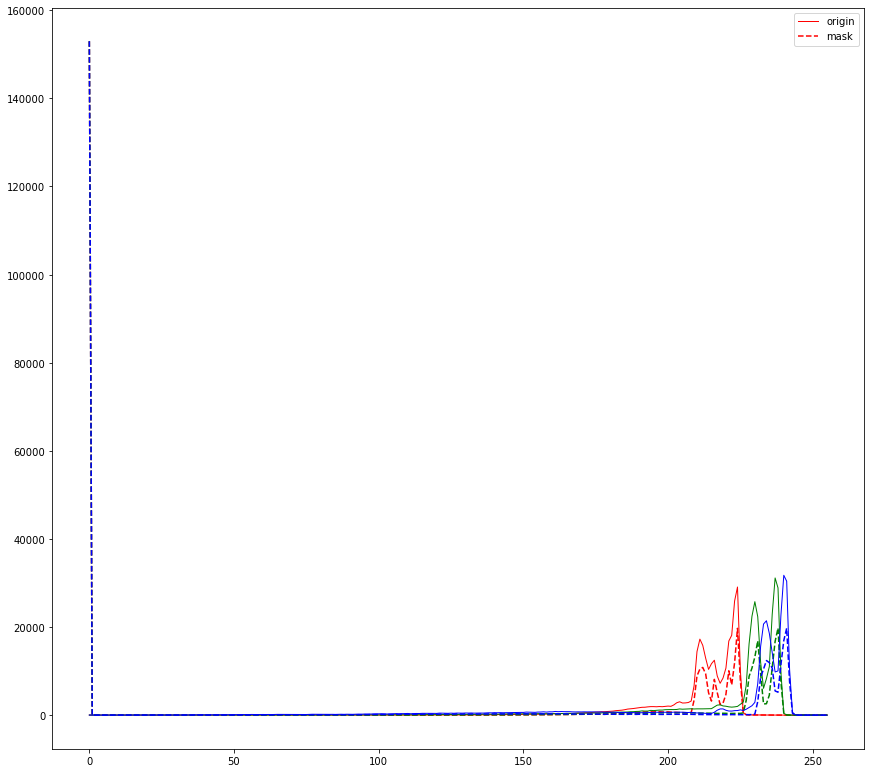

In [85]:



plt.figure(figsize = (15,12))
plt.subplot(221); plt.imshow(img); plt.title("Original Image")
plt.subplot(222); plt.imshow(masked_img); plt.title("Masked Image")
plt.figure(figsize = (32, 30))
ch = ['r','g','b']
plt.subplot(223)
for i,color in enumerate(ch):
    hist_full = cv2.calcHist([img], [i], None, [256], [0,256])
    hist_mask = cv2.calcHist([masked_img], [i], None, [256], [0,256])
    plt.plot(hist_full, color = color, linestyle = '-',linewidth = 1), plt.plot(hist_mask, color = color, linestyle = '--')
    plt.legend(['origin','mask'])
plt.show()